## 5. Write a program to demonstrate the working of decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

Weather: {'rainy': 0, 'sunny': 1, 'windy': 2}
Parents: {'no-visit': 0, 'visit': 1}
Cash: {'poor': 0, 'rich': 1}
Exam: {'no': 0, 'yes': 1}
Decision: {'cinema': 0, 'shopping': 1, 'stay-in': 2, 'tennis': 3}


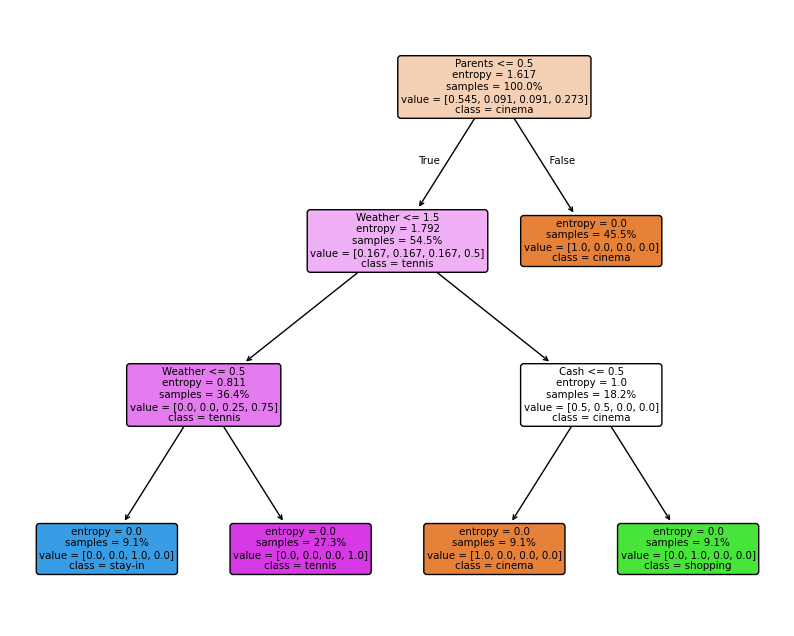

The predicted decision for the sample is: tennis


In [42]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "Weather": ["sunny", "sunny", "windy", "rainy", "rainy", "rainy", "windy", "windy", "windy", "sunny", "sunny"],
    "Parents": ["visit", "no-visit", "visit", "visit", "no-visit", "visit", "no-visit", "no-visit", "visit", "no-visit", "no-visit"],
    "Cash": ["rich", "rich", "rich", "poor", "rich", "poor", "poor", "rich", "rich", "rich", "poor"],
    "Exam": ["yes", "no", "no", "yes", "no", "no", "yes", "yes", "no", "no", "yes"],
    "Decision": ["cinema", "tennis", "cinema", "cinema", "stay-in", "cinema", "cinema", "shopping", "cinema", "tennis", "tennis"]
})

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(f"{col}: {mapping}")

x = df.drop(columns=["Decision"])
y = df["Decision"]

clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(x, y)

plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=x.columns, class_names=encoder.classes_, filled=True, rounded=True, proportion=True)
plt.show()

sample = pd.DataFrame([["sunny", "no-visit", "rich", "no"]], columns=x.columns)

for col in new_sample.columns:
    sample[col] = encoders[col].transform(sample[col])
    
predicted = encoders["Decision"].inverse_transform(clf.predict(sample))

print(f"The predicted decision for the sample is: {predicted[0]}")